**Step-by-Step Affine Transformatiom**
1) Load the Image
2) Apply Translation (Shifting)
3) Apply Scaling (Resizing)
4) Apply Rotation
5) Apply Shearing
6) Combine all in a single Affine Transformation

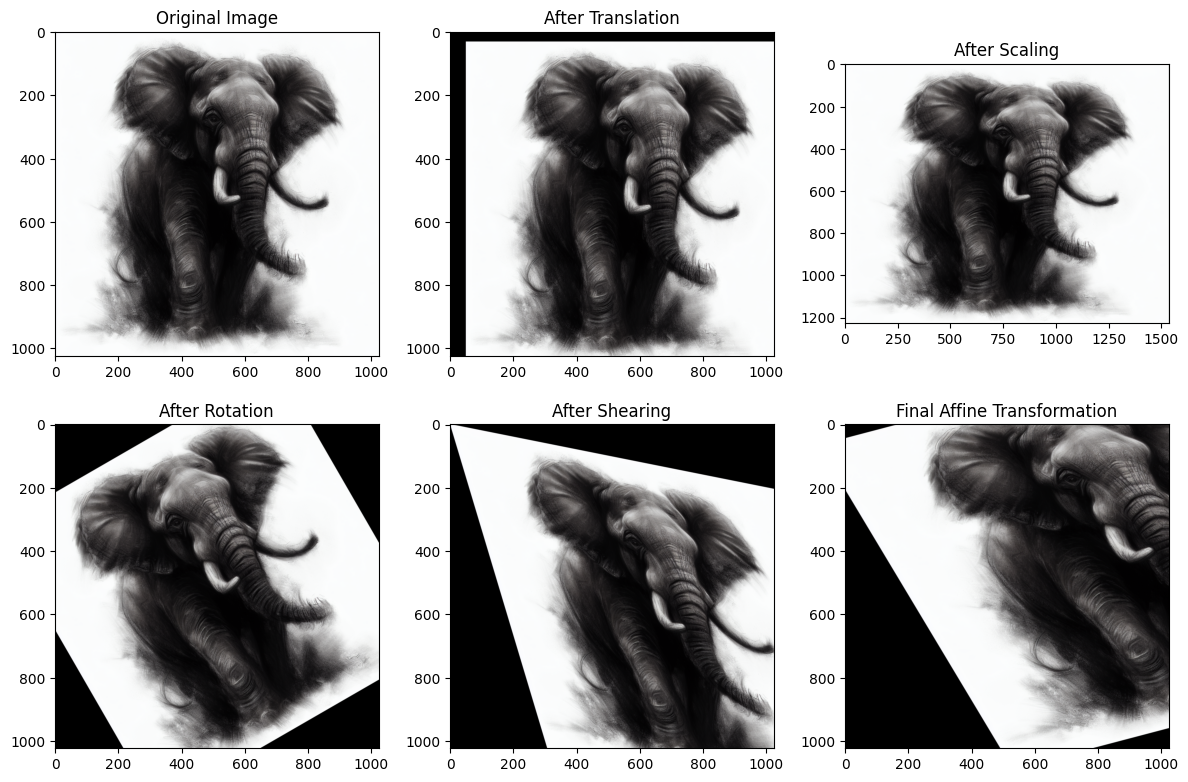

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("elp.png")  # Change to your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper visualization
rows, cols, ch = image.shape

# Display Original Image
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(image)

# **Step 1: Translation (Shifting)**
tx, ty = 50, 30  # Shift 50 pixels right, 30 pixels down
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_img = cv2.warpAffine(image, translation_matrix, (cols, rows))
plt.subplot(232)
plt.title("After Translation")
plt.imshow(translated_img)

# **Step 2: Scaling (Resizing)**
scale_x, scale_y = 1.5, 1.2  # Scale width by 1.5x and height by 1.2x
scaling_matrix = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])
scaled_img = cv2.warpAffine(image, scaling_matrix, (int(cols * scale_x), int(rows * scale_y)))
plt.subplot(233)
plt.title("After Scaling")
plt.imshow(scaled_img)

# **Step 3: Rotation**
angle = 30  # Rotate by 30 degrees
center = (cols // 2, rows // 2)  # Rotate around the image center
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
rotated_img = cv2.warpAffine(image, rotation_matrix, (cols, rows))
plt.subplot(234)
plt.title("After Rotation")
plt.imshow(rotated_img)

# **Step 4: Shearing**
shear_factor_x, shear_factor_y = 0.3, 0.2  # Shear along x and y axis
shearing_matrix = np.float32([[1, shear_factor_x, 0], [shear_factor_y, 1, 0]])
sheared_img = cv2.warpAffine(image, shearing_matrix, (cols, rows))
plt.subplot(235)
plt.title("After Shearing")
plt.imshow(sheared_img)

# **Step 5: Combined Affine Transformation**
# Define three corresponding points before and after transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])  # Original points
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])  # Transformed points

# Compute Affine Transformation Matrix
affine_matrix = cv2.getAffineTransform(pts1, pts2)

# Apply transformation
affine_transformed_img = cv2.warpAffine(image, affine_matrix, (cols, rows))
plt.subplot(236)
plt.title("Final Affine Transformation")
plt.imshow(affine_transformed_img)

plt.tight_layout()
plt.show()


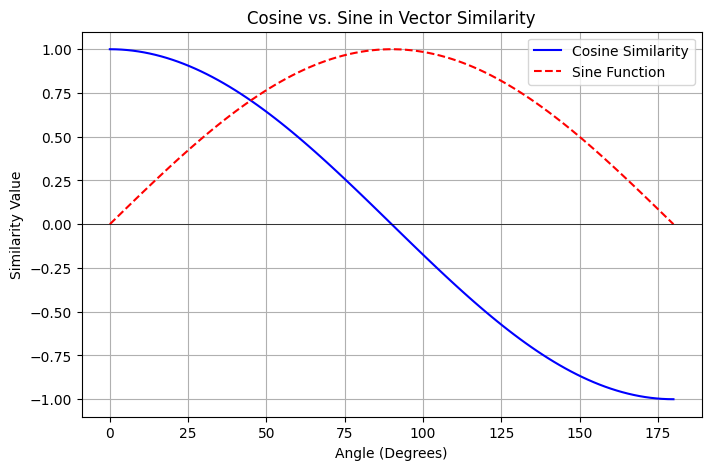

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate angles from 0 to 180 degrees
angles = np.linspace(0, 180, 100)
cos_values = np.cos(np.radians(angles))
sin_values = np.sin(np.radians(angles))

# Plot the Cosine and Sine values
plt.figure(figsize=(8,5))
plt.plot(angles, cos_values, label='Cosine Similarity', color='b')
plt.plot(angles, sin_values, label='Sine Function', color='r', linestyle='dashed')

# Labels and title
plt.xlabel('Angle (Degrees)')
plt.ylabel('Similarity Value')
plt.title('Cosine vs. Sine in Vector Similarity')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()

# Show plot
plt.show()
